# Prosper Loan Data Exploration

## by Erik Sorensen

## Preliminary Wrangling

> The Prosper dataset contains peer-to-peer loan data from 2005-2014. We want to explore which factors affect the annual percentage rate (APR) for borrowers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load and characterize the dataset

In [2]:
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
prosper.describe().iloc[:,0:20]

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,26.000000,660.000000,679.000000,7.000000,6.000000,17.000000,4.00000,114.000000,0.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000,67.000000,680.000000,699.000000,10.000000,9.000000,25.000000,6.00000,271.000000,1.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,3.000000,137.000000,720.000000,739.000000,13.000000,12.000000,35.000000,9.00000,525.000000,2.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,755.000000,880.000000,899.000000,59.000000,54.000000,136.000000,51.00000,14985.000000,105.000000


In [6]:
prosper.describe().iloc[:,20:40]

,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed
count,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000
mean,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961
std,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.121000e+03,0.310000,880.000000,15.000000,0.820000,0.000000,0.140000,3.200333e+03,1.000000,9.000000,9.000000,0.000000,0.000000,3500.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.549000e+03,0.600000,4100.000000,22.000000,0.940000,0.000000,0.220000,4.666667e+03,1.000000,16.000000,15.000000,0.000000,0.000000,6000.000000
75%,7.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.952100e+04,0.840000,13180.000000,30.000000,1.000000,1.000000,0.320000,6.825000e+03,2.000000,33.000000,32.000000,0.000000,0.000000,11000.000000
max,379.000000,83.000000,463881.000000,99.000000,38.000000,20.000000,1.435667e+06,5.950000,646285.000000,126.000000,1.000000,20.000000,10.010000,1.750003e+06,8.000000,141.000000,141.000000,42.000000,21.000000,72499.000000


In [8]:
prosper.describe().iloc[:,40:61]

,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,-35.000000,0.000000,9.000000,6.000000,37332.000000,4000.00000,131.620000,1005.760000,500.890000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,1626.550000,-3.000000,0.000000,14.000000,21.000000,68599.000000,6500.00000,217.740000,2583.830000,1587.500000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,4126.720000,25.000000,0.000000,22.000000,65.000000,101901.000000,12000.00000,371.580000,5548.400000,4000.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,23450.950000,286.000000,2704.000000,44.000000,100.000000,136486.000000,35000.00000,2251.510000,40702.390000,35000.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [9]:
# convert the date fields that are of interest
prosper['ListingCreationDate'] = pd.to_datetime(prosper['ListingCreationDate'])

In [10]:
prosper['ClosedDate'] = pd.to_datetime(prosper['ClosedDate'])
prosper['LoanOriginationDate'] = pd.to_datetime(prosper['LoanOriginationDate'])

In [11]:
display(prosper['ListingCreationDate'].min())
display(prosper['ListingCreationDate'].max())

Timestamp('2005-11-09 20:44:28.847000')

Timestamp('2014-03-10 12:20:53.760000')

In [12]:
prosper['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [13]:
prosper['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

> The data dictionary says the range for `ProsperScore` is 1-10; `describe()` above shows there are 11s.
However, [Prosper's website](https://www.prosper.com/help/topics/general-prosper_score.aspx) lists the actual range as 1-11, so 11's aren't erroneous

In [14]:
prosper['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

> These categories appear to overlap heavily (e.g "Employed" vs. "Full-time" vs. "Self-employed") in a way that we won't be able to resolve. This variable will not be analyzed further.

In [15]:
prosper['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [16]:
prosper['IncomeVerifiable'].value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

In [17]:
prosper['TotalProsperLoans'].value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
0.0        1
8.0        1
Name: TotalProsperLoans, dtype: int64

In [18]:
prosper['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

> The Prosper risk score, which is a combination of factors believed to relate to the likelihood of success of the loan, is only avaialable for loans after 2009. Since this is likely to be a key variable, we'll limit the dataset to only entries with a risk score

In [19]:
# limit to just data with Prosper risk score
prosper2 = prosper[~prosper['ProsperScore'].isna()]
prosper2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           84853 non-null  object        
 1   ListingNumber                        84853 non-null  int64         
 2   ListingCreationDate                  84853 non-null  datetime64[ns]
 3   CreditGrade                          0 non-null      object        
 4   Term                                 84853 non-null  int64         
 5   LoanStatus                           84853 non-null  object        
 6   ClosedDate                           26005 non-null  datetime64[ns]
 7   BorrowerAPR                          84853 non-null  float64       
 8   BorrowerRate                         84853 non-null  float64       
 9   LenderYield                          84853 non-null  float64       
 10  Estimated

> According to the [Prosper website](https://www.prosper.com/help/topics/general-prosper_score.aspx), the following are part of the Prosper score and will not be considered individually:
- Number of trades
- Number of delinquent accounts
- Number of inquiries
- Number of recently opened trades 
- Amount of available credit on bankcard
- Bankcard utilization

> The following are discrete and can be converted to integers:
- `ProsperScore`
- `ProsperRating`
- `TotalProsperLoans`
- `CurrentCreditLines`
- `OpenCreditLines`
- `TotalCreditLinespast7years`
- `DelinquenciesLast7Years`
- `TotalTrades`

In [20]:
prosper2['ProsperScore'] = prosper2['ProsperScore'].astype(int)

<ipython-input-20-cb525cc2426c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper2['ProsperScore'] = prosper2['ProsperScore'].astype(int)


In [21]:
prosper2['ProsperRating (numeric)'] = prosper2['ProsperRating (numeric)'].astype(int)

<ipython-input-21-555ad4982f8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper2['ProsperRating (numeric)'] = prosper2['ProsperRating (numeric)'].astype(int)


In [22]:
# for this one, need to make the nulls equal zero
prosper2['TotalProsperLoans'].fillna(0, inplace=True)

/home/umahp/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [23]:
prosper2['TotalProsperLoans'] = prosper2['TotalProsperLoans'].astype(int)

<ipython-input-23-f5b5467b40c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper2['TotalProsperLoans'] = prosper2['TotalProsperLoans'].astype(int)


In [24]:
prosper2['CurrentCreditLines'] = prosper2['CurrentCreditLines'].astype(int)

<ipython-input-24-8a6e376bcd45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper2['CurrentCreditLines'] = prosper2['CurrentCreditLines'].astype(int)


In [25]:
prosper2['OpenCreditLines'] = prosper2['OpenCreditLines'].astype(int)

<ipython-input-25-e15ef6a2e887>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper2['OpenCreditLines'] = prosper2['OpenCreditLines'].astype(int)


In [26]:
prosper2['TotalCreditLinespast7years'] = prosper2['TotalCreditLinespast7years'].astype(int)

<ipython-input-26-ed3d10a40d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper2['TotalCreditLinespast7years'] = prosper2['TotalCreditLinespast7years'].astype(int)


In [27]:
prosper2['DelinquenciesLast7Years'] = prosper2['DelinquenciesLast7Years'].astype(int)

<ipython-input-27-908333478210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper2['DelinquenciesLast7Years'] = prosper2['DelinquenciesLast7Years'].astype(int)


In [28]:
prosper2['TotalTrades'] = prosper2['TotalTrades'].astype(int)

<ipython-input-28-05493792010f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper2['TotalTrades'] = prosper2['TotalTrades'].astype(int)


### Dataset structure

> The dataset is a collection of loan listings, with one entry per loan. For each loan, there is information on its status, financial parameters (e.g. term, amount, interest rate, APR), on credit-related variables for the borrower (e.g. employment, credit rating, income), and on the investments in the loan.

### Main features of interest for the investigation

> The main features of interest are those that may influence the borrower's APR. This would include credit-related variables like credit score, Prosper risk score, employment status, income, and previous Prosper loans.

### Dataset attributes pertinent to studying the features of interest

> The dataset is fairly clean and tidy, without obvious missing or erroneous data or improperly constructed fields. Multiple loan parameter- and borrower-related variables are available to test for their effect on APR.

> The exception is `EmploymentStatus` which has multiple redundant/overlapping fields. This does not appear resolveable, and this variable won't be explored further.

## Univariate Exploration


In [29]:
prosper2['Term'].value_counts()

36    58695
60    24545
12     1613
Name: Term, dtype: int64

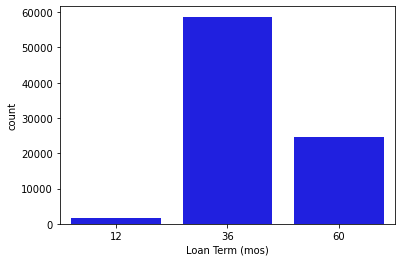

In [31]:
sb.countplot(data=prosper2, x='Term', color='blue')
plt.xlabel('Loan Term (mos)')
plt.ylabel('count');

>`Term` is discrete and 12, 36 or 60 months

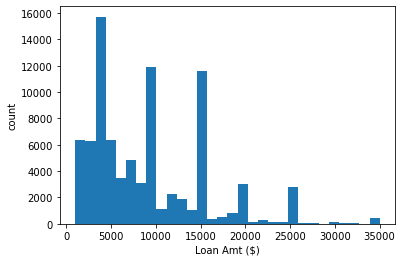

In [32]:
plt.hist(data=prosper2, x='LoanOriginalAmount', bins=30)
plt.xlabel('Loan Amt ($)')
plt.ylabel('count');

> Amount appears right-skewed with most loans <= \\$15,000. There appear to be peaks roughly at \\$5000 increments.

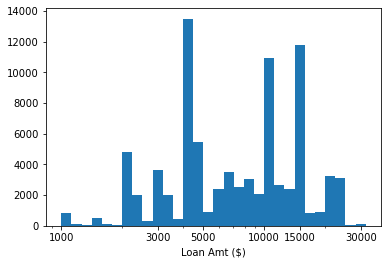

In [33]:
bins = 10**np.arange(3,4.5+0.05,0.05)
new_tix = [1000, 3000, 5000, 10000, 15000,30000]
new_labs = ['{}'.format(v) for v in new_tix]
plt.hist(data=prosper2, x='LoanOriginalAmount',bins=bins)
plt.xscale('log')
plt.xlabel("Loan Amt ($)")
plt.xticks(new_tix, new_labs);

> The log scale mostly emphasizes the discrete peaks in the <= \\$15,000 range.

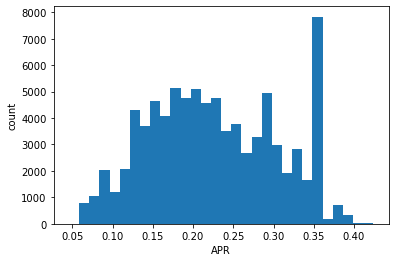

In [34]:
plt.hist(data=prosper2, x='BorrowerAPR', bins=30)
plt.xlabel('APR')
plt.ylabel('count');

> APR is nearly normally distributed, but has peaks near 0.30 and 0.35. 

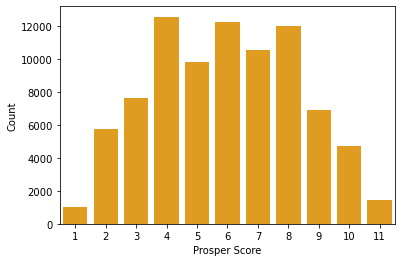

In [35]:
sb.countplot(data=prosper2, x='ProsperScore',color='orange')
plt.xlabel('Prosper Score')
plt.ylabel('Count');

> The Prosper score is nearly normally distributed, except that it is relatively flat in the 4-8 range

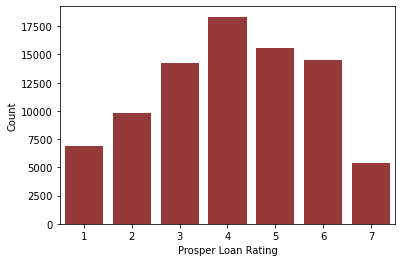

In [36]:
sb.countplot(data=prosper2, x='ProsperRating (numeric)',color='brown')
plt.xlabel('Prosper Loan Rating')
plt.ylabel('Count');

> The Loan Rating is nearly normally distributed, with a peak at 4. It is similar to, but not completely the same as, the risk score distribution.

> According to [Prosper's site](https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline), Loan Rating is a combination of Prosper score and credit score, so the two should be similar.

> Credit Score is given as Lower and Upper Values. Will calculate the average.

In [37]:
prosper2['CreditScoreAvg'] = 0.5*(prosper2['CreditScoreRangeLower']+prosper2['CreditScoreRangeUpper'])
prosper2['CreditScoreAvg'].describe()

<ipython-input-37-e6b667d8993d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper2['CreditScoreAvg'] = 0.5*(prosper2['CreditScoreRangeLower']+prosper2['CreditScoreRangeUpper'])


count    84853.000000
mean       708.890240
std         47.095937
min        609.500000
25%        669.500000
50%        709.500000
75%        729.500000
max        889.500000
Name: CreditScoreAvg, dtype: float64

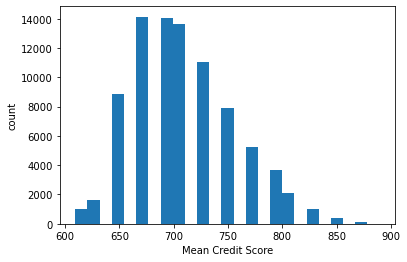

In [38]:
plt.hist(data=prosper2, x='CreditScoreAvg', bins=25)
plt.xlabel('Mean Credit Score')
plt.ylabel('count');

> Credit Score appears to be concentrated at certain discrete values. It is slightly right-skewed, with a single peak around 700.

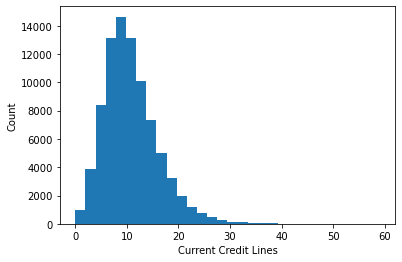

In [39]:
plt.hist(data=prosper2, x='CurrentCreditLines', bins=30)
plt.xlabel('Current Credit Lines')
plt.ylabel('Count');

> Current credit lines is nearly normal except for a long narrow right tail

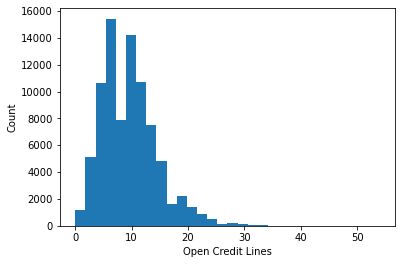

In [40]:
plt.hist(data=prosper2, x='OpenCreditLines', bins=30)
plt.xlabel('Open Credit Lines')
plt.ylabel('Count');

> Open credit lines has a multimodal distribution with peaks near ~5, ~10, and ~20. Similar to current credit lines it has a long right tail.

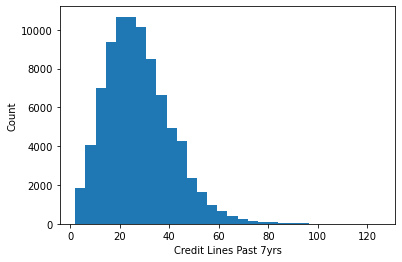

In [41]:
plt.hist(data=prosper2, x='TotalCreditLinespast7years', bins=30)
plt.xlabel('Credit Lines Past 7yrs')
plt.ylabel('Count');

> This displays a similar distribution to current credit lines, although the x-values are larger

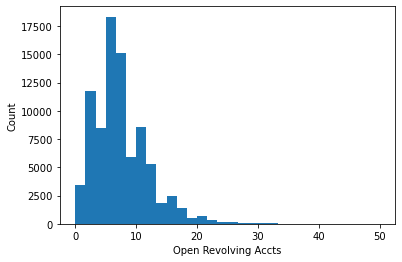

In [42]:
plt.hist(data=prosper2, x='OpenRevolvingAccounts', bins=30)
plt.xlabel('Open Revolving Accts')
plt.ylabel('Count');

> This distribution is multimodal with several peaks.

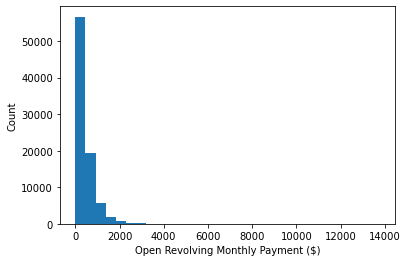

In [43]:
plt.hist(data=prosper2, x='OpenRevolvingMonthlyPayment', bins=30)
plt.xlabel('Open Revolving Monthly Payment ($)')
plt.ylabel('Count');

> This is very highly right-skewed. Check to see how many outliers there are.

In [44]:
prosper2[prosper2['OpenRevolvingMonthlyPayment']>3000]['OpenRevolvingMonthlyPayment'].count()

167

In [45]:
prosper2[prosper2['OpenRevolvingMonthlyPayment']>4000]['OpenRevolvingMonthlyPayment'].count()

35

> Will treat values > 3000 as outliers and remove them

In [46]:
prosper2_bu = prosper2
prosper2 = prosper2[prosper2['OpenRevolvingMonthlyPayment'] <= 3000]

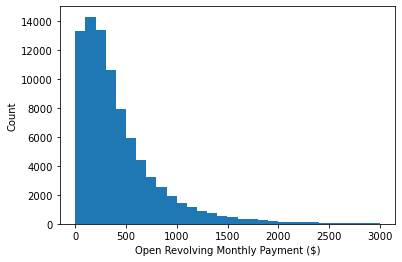

In [47]:
plt.hist(data=prosper2, x='OpenRevolvingMonthlyPayment', bins=30)
plt.xlabel('Open Revolving Monthly Payment ($)')
plt.ylabel('Count');

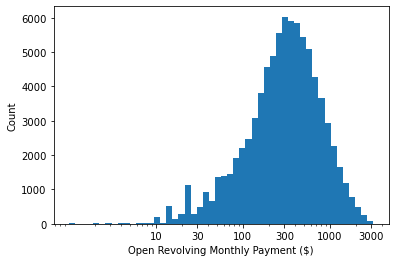

In [48]:
bins = 10**np.arange(0,3.5+0.07,0.07)
new_tix = [10, 30, 100, 300, 1000, 3000]
new_labs = ['{}'.format(v) for v in new_tix]
plt.hist(data=prosper2, x='OpenRevolvingMonthlyPayment', bins=bins)
plt.xlabel('Open Revolving Monthly Payment ($)')
plt.xscale('log')
plt.ylabel('Count')
plt.xticks(new_tix, new_labs);

> This remains highly right-skewed on a standard scale, with a peak near ~300. On a log scale it is left-skewed due to the small number of entries that approach zero.

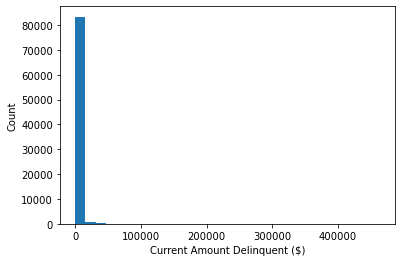

In [49]:
plt.hist(data=prosper2, x='AmountDelinquent', bins=30)
plt.xlabel('Current Amount Delinquent ($)')
plt.ylabel('Count');

> Again, very highly right-skewed. Check to see how many outliers there are.

In [50]:
prosper2[prosper2['AmountDelinquent']==0]['AmountDelinquent'].count()

73684

> Vast majority of borrowers have no amount delinquent. This variable probably not useful for further analysis.

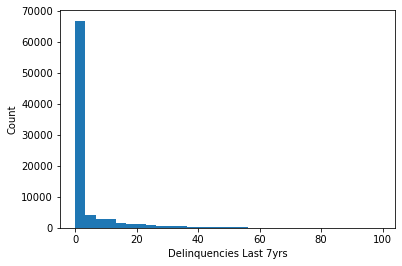

In [51]:
plt.hist(data=prosper2, x='DelinquenciesLast7Years', bins=30)
plt.xlabel('Delinquencies Last 7yrs')
plt.ylabel('Count');

In [52]:
prosper2[prosper2['DelinquenciesLast7Years']==0]['DelinquenciesLast7Years'].count()

59831

> Again, vast majority of borrowers have no deliquencies in 7 yrs. This variable also probably not useful for further analysis.

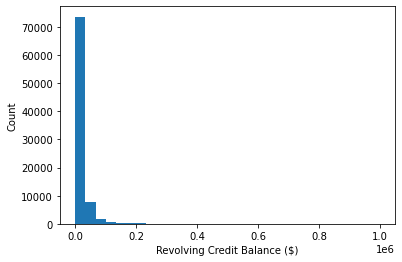

In [53]:
plt.hist(data=prosper2, x='RevolvingCreditBalance', bins=30)
plt.xlabel('Revolving Credit Balance ($)')
plt.ylabel('Count');

In [54]:
prosper2[prosper2['RevolvingCreditBalance']==0.0]['RevolvingCreditBalance'].count()

2115

> This is again right-skewed, but not because vast majority have a zero balance. Let's look more at outliers.

In [55]:
prosper2[prosper2['RevolvingCreditBalance']>1e5]['RevolvingCreditBalance'].count()

1591

In [56]:
prosper2[prosper2['RevolvingCreditBalance']>2e5]['RevolvingCreditBalance'].count()

319

> Treat values > 200k as outliers & remove

In [57]:
prosper2_bu = prosper2
prosper2 = prosper2[prosper2['RevolvingCreditBalance'] <= 2e5]

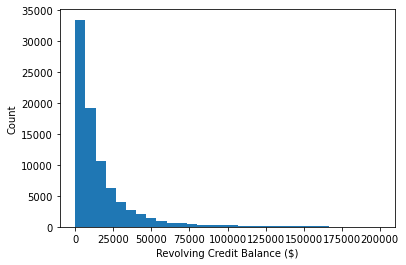

In [58]:
plt.hist(data=prosper2, x='RevolvingCreditBalance', bins=30)
plt.xlabel('Revolving Credit Balance ($)')
plt.ylabel('Count');

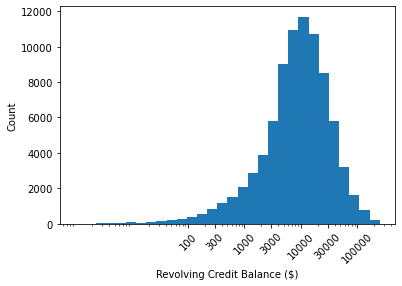

In [59]:
bins = 10**np.arange(0,5.4,0.18)
new_tix = [100, 300, 1000, 3000, 10000, 30000, 100000]
new_labs = ['{}'.format(v) for v in new_tix]
plt.hist(data=prosper2, x='RevolvingCreditBalance', bins=bins)
plt.xlabel('Revolving Credit Balance ($)')
plt.xscale('log')
plt.ylabel('Count')
plt.xticks(new_tix, new_labs, rotation=45);

> This variable remains right-skewed on a standard scale. On a log scale it becomes left-skewed due to values approaching zero. The peak is around \\$10k.

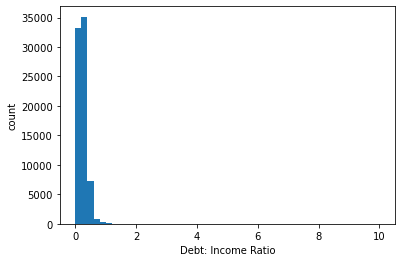

In [60]:
plt.hist(data=prosper2, x='DebtToIncomeRatio', bins=50)
plt.xlabel('Debt: Income Ratio')
plt.ylabel('count');

> Check to see what the outlier distribution looks like

In [61]:
prosper2[prosper2['DebtToIncomeRatio']>1.0]['DebtToIncomeRatio'].count()

323

In [62]:
prosper2[prosper2['DebtToIncomeRatio']>1.0]['DebtToIncomeRatio'].mean()

3.4302167182662533

In [63]:
prosper2[prosper2['DebtToIncomeRatio']>5.0]['DebtToIncomeRatio'].count()

79

In [64]:
prosper2[prosper2['DebtToIncomeRatio']>5.0]['DebtToIncomeRatio'].mean()

8.573797468354424

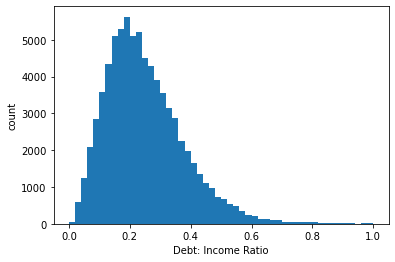

In [65]:
bins = np.arange(0,1+0.02, 0.02)
plt.hist(data=prosper2, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('Debt: Income Ratio')
plt.ylabel('count');

> Debt:Income ratio is very highly right-skewed. Most values are < 0.6, with a peak near 0.2

> Remove values > 1 as outliers since may over-influence bivariate relationships

In [66]:
prosper2_bu = prosper2
prosper2 = prosper2[prosper2['DebtToIncomeRatio'] <= 1.0]

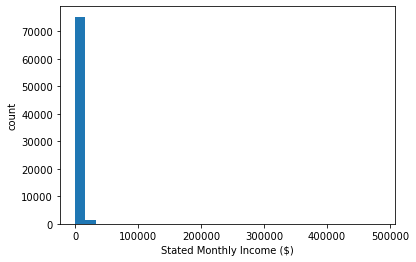

In [67]:
plt.hist(data=prosper2, x='StatedMonthlyIncome', bins=30)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count');

> This appears to max out in the \\$500k range, while the vast majority are much smaller & 75th percentile from the original dataset was around \\$6800
Look at how many outliers, and where they are.

In [68]:
prosper2[prosper2['StatedMonthlyIncome']>1e4]['StatedMonthlyIncome'].count()

7187

In [69]:
prosper2[prosper2['StatedMonthlyIncome']>5e4]['StatedMonthlyIncome'].count()

31

In [70]:
prosper2[prosper2['StatedMonthlyIncome']>5e4]['IncomeVerifiable'].value_counts()

True    31
Name: IncomeVerifiable, dtype: int64

In [71]:
prosper2[prosper2['StatedMonthlyIncome']>1e5]['StatedMonthlyIncome'].count()

6

In [72]:
prosper2[prosper2['StatedMonthlyIncome']>1e5]['IncomeVerifiable'].value_counts()

True    6
Name: IncomeVerifiable, dtype: int64

> While there are a non-negligible number of borrower incomes >\\$10k/month, there are very few >\\$50k/month. 

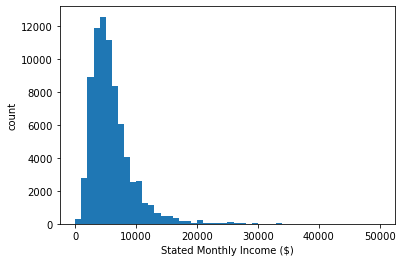

In [73]:
bins = np.arange(0,5e4+1000, 1000)
plt.hist(data=prosper2, x='StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count');

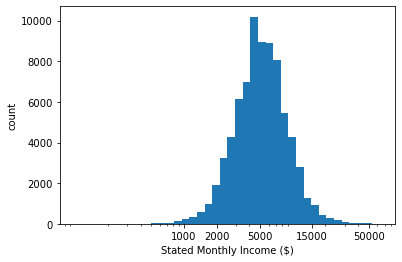

In [74]:
bins = 10**np.arange(2,4.8+0.07, 0.07)
plt.hist(data=prosper2, x='StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
new_tix = [1000, 2000, 5000, 15000, 50000]
new_labs = ['{}'.format(v) for v in new_tix]
plt.ylabel('count')
plt.xscale('log')
plt.xticks(new_tix, new_labs);

> As expected, the limited distribution is right-skewed, with a peak around \\$5,000

> Remove values >\\$50k/mo as these outliers may have an excess influence on bivariate relationships

In [75]:
prosper2_bu = prosper2.copy()
prosper2 = prosper2[prosper2['StatedMonthlyIncome'] <= 5e4]

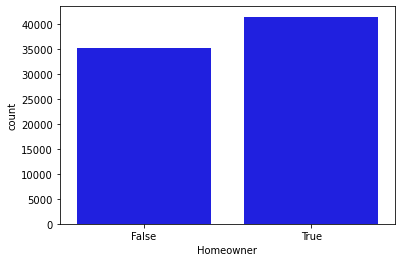

In [76]:
sb.countplot(data=prosper2, x='IsBorrowerHomeowner', color='blue')
plt.xlabel('Homeowner')
plt.ylabel('count');

> A slight majority of borrowers are homeowners

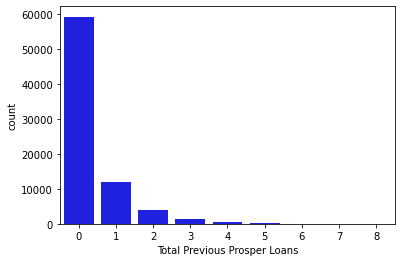

In [77]:
sb.countplot(data=prosper2, x='TotalProsperLoans', color='blue')
plt.xlabel('Total Previous Prosper Loans')
plt.ylabel('count');

> The `TotalProsperLoans` variable only includes those who've had a previous loan. Of those, most have had one loan. For analysis purposes, we'll split this into Zero, 1, and >1.

In [78]:
prosper2['TotalProsperLoans'].value_counts()

0    59283
1    11873
2     3883
3     1267
4      373
5       93
6       25
7        7
8        1
Name: TotalProsperLoans, dtype: int64

In [79]:
prosper2['NumLoans']=''
prosper2.loc[prosper2['TotalProsperLoans'] == 0.0,'NumLoans'] = "None"
prosper2.loc[prosper2['TotalProsperLoans'] == 1.0,'NumLoans'] = "One"
prosper2.loc[prosper2['TotalProsperLoans'] > 1.0,'NumLoans'] = "Multiple"
prosper2['NumLoans'].value_counts()

None        59283
One         11873
Multiple     5649
Name: NumLoans, dtype: int64

In [80]:
loan_classes = ['None','One','Multiple']
lclasses = pd.api.types.CategoricalDtype(ordered=True, categories=loan_classes)
prosper2['NumLoans'] = prosper2['NumLoans'].astype(lclasses)

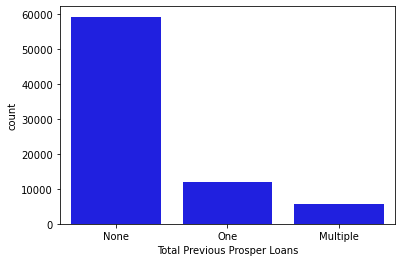

In [81]:
sb.countplot(data=prosper2, x='NumLoans', color='blue')
plt.xlabel('Total Previous Prosper Loans')
plt.ylabel('count');

> Most borrowers have not had a prior Prosper loan. 

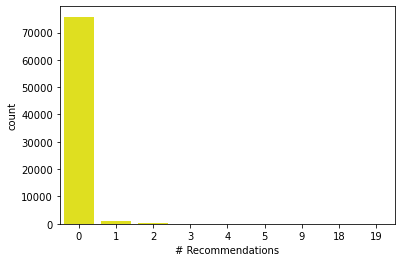

In [82]:
sb.countplot(data=prosper2, x='Recommendations', color='yellow')
plt.xlabel('# Recommendations')
plt.ylabel('count');

In [83]:
prosper2[prosper2['Recommendations']>0]['Recommendations'].value_counts()

1     872
2     129
3      16
18      2
5       2
4       2
19      1
9       1
Name: Recommendations, dtype: int64

> Very few borrowers had a recommendation. Probably not useful for further analysis.

### Distributions of your variables of interest, treatments of outliers, and transformations

> Two variables displayed right-skewed histograms. These were log-transformed to better assess their distributions. These were `LoanOriginalAmount` and `StatedMonthlyIncome`.

> `OpenRevolvingMonthlyPayment` is highly concentrated in the <\\$3,000 range. Values > \\$3,000 were removed as outliers.

> `RevolvingCreditBalance` is highly concentrated in the <\\$100k range. Values > \\$200k were removed as outliers.

> `DebtToIncomeRatio` is also highly concentrated, in the 0.0-0.6 range. Values beyond 1 were rare and beyond 5, very rare. TValues > 1.0 were removed as outliers.

> Similarly, `StatedMonthlyIncome` has a few outliers in the \>\\$50k/month range that were removed.

### Distributions of features investigated & data manipulations performed

> Multiple `float` variables contained discrete data, so they were converted from floats to integers (see the Wrangling section for the full list)

> Credit Score was reported as lower and upper limits. These were averaged to give a single credit score variable for analysis, since it is unclear what the significance of the separate lower and upper values is.

> `TotalProsperLoans` is highly concentrated at zero, then has another peak at one, then multiple higher values. This variable was split into three categories: None, One, and Multiple to simplify further analysis.

## Bivariate Exploration


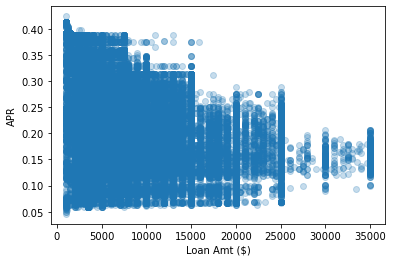

In [84]:
plt.scatter(data=prosper2, x='LoanOriginalAmount', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Loan Amt ($)')
plt.ylabel('APR');

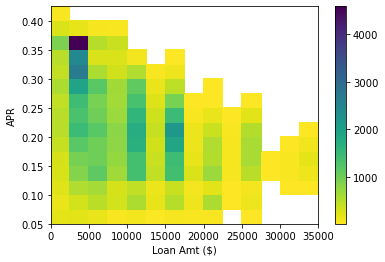

In [85]:
bins_x = np.arange(0, 37500, 2500)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'LoanOriginalAmount', y = 'BorrowerAPR', cmin=10, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Loan Amt ($)')
plt.ylabel('APR');

> APR tends to decrease with increasing loan amount. This is most pronounced at the highest amounts.

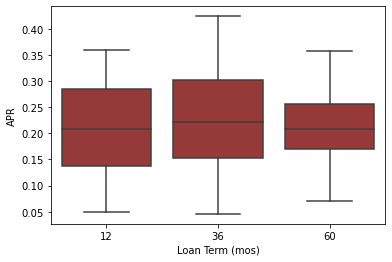

In [86]:
sb.boxplot(data=prosper2, x='Term', y='BorrowerAPR', color='brown')
plt.ylabel('APR')
plt.xlabel('Loan Term (mos)');

> There is not an obvious relationship between loan term and APR

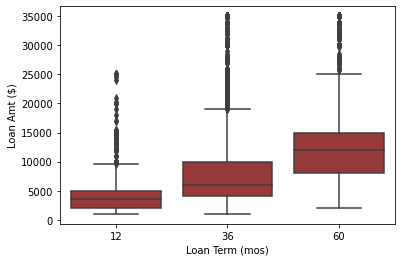

In [87]:
sb.boxplot(data=prosper2, x='Term', y='LoanOriginalAmount', color='brown')
plt.ylabel('Loan Amt ($)')
plt.xlabel('Loan Term (mos)');

> Loan term tends to be longer for larger loans

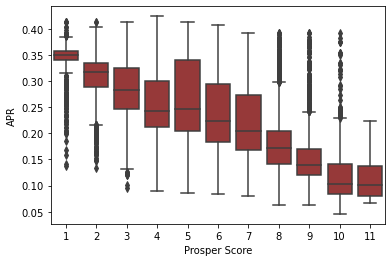

In [88]:
sb.boxplot(data=prosper2, x='ProsperScore', y='BorrowerAPR', color='brown')
plt.ylabel('APR')
plt.xlabel('Prosper Score');

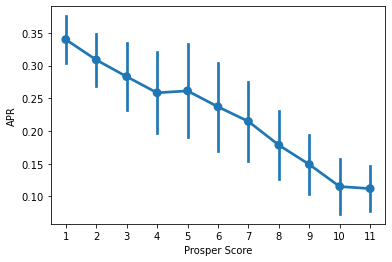

In [89]:
sb.pointplot(data=prosper2, x='ProsperScore', y='BorrowerAPR', ci='sd')
plt.ylabel('APR')
plt.xlabel('Prosper Score');

> Borrower APR decreases in a near-linear fashion with increasing Prosper risk score

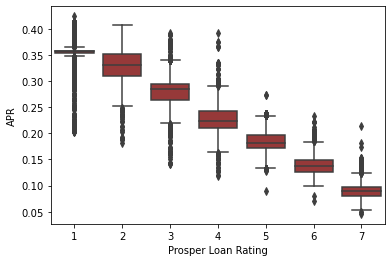

In [90]:
sb.boxplot(data=prosper2, x='ProsperRating (numeric)', y='BorrowerAPR', color='brown')
plt.ylabel('APR')
plt.xlabel('Prosper Loan Rating');

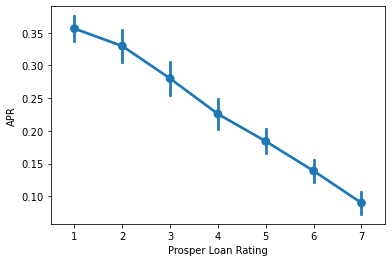

In [91]:
sb.pointplot(data=prosper2, x='ProsperRating (numeric)', y='BorrowerAPR', ci='sd')
plt.ylabel('APR')
plt.xlabel('Prosper Loan Rating');

> Similar to Prosper score, APR declines with higher loan rating. This is expected, since Prosper score is part of loan rating. However, this relationship is stronger, with a more consistent slope and smaller standard deviations at each rating.

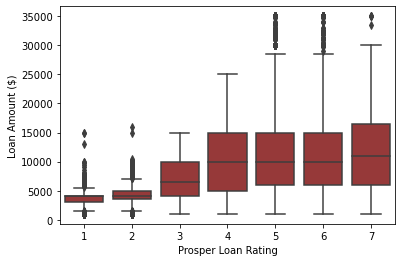

In [92]:
sb.boxplot(data=prosper2, x='ProsperRating (numeric)', y='LoanOriginalAmount', color='brown')
plt.ylabel('Loan Amount ($)')
plt.xlabel('Prosper Loan Rating');

> Loan amount tends to be lowest for loans rated 1 or 2, then slightly higher for loans rated 3. Loans rate 4-7 do not show a major difference in loan amount.

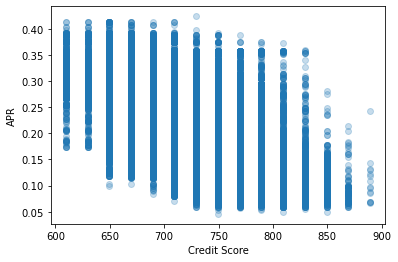

In [93]:
plt.scatter(data=prosper2, x='CreditScoreAvg', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Credit Score')
plt.ylabel('APR');

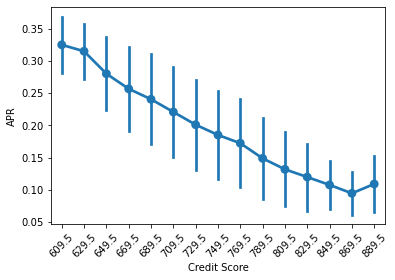

In [94]:
sb.pointplot(data=prosper2, x='CreditScoreAvg', y='BorrowerAPR', ci='sd')
plt.ylabel('APR')
plt.xlabel('Credit Score')
plt.xticks(rotation=45);

> Again, trend is similar to Prosper score & loan rating, which would be expected. Trend is similar to Prosper Score and not as strong as Loan Rating

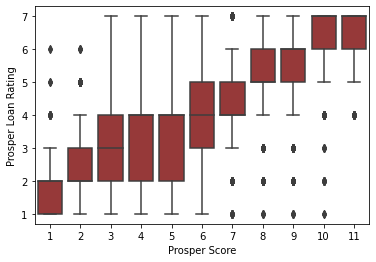

In [95]:
sb.boxplot(data=prosper2, x='ProsperScore', y='ProsperRating (numeric)', color='brown')
plt.ylabel('Prosper Loan Rating')
plt.xlabel('Prosper Score');

> The loan rating appears to depend on the Prosper score in a stepwise-increasing fashion

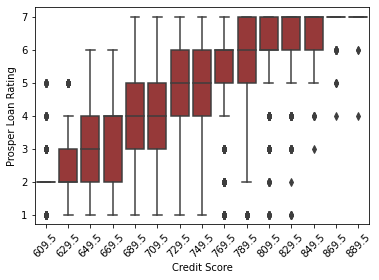

In [96]:
sb.boxplot(data=prosper2, x='CreditScoreAvg', y='ProsperRating (numeric)', color='brown')
plt.ylabel('Prosper Loan Rating')
plt.xlabel('Credit Score')
plt.xticks(rotation=45);

> Similarly, the loan rating appears to depend on the credit score in a stepwise-increasing fashion

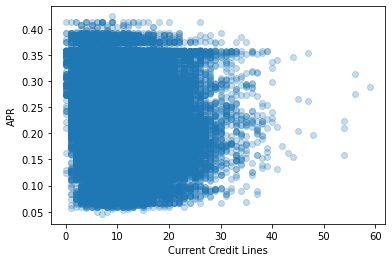

In [99]:
plt.scatter(data=prosper2, x='CurrentCreditLines', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Current Credit Lines')
plt.ylabel('APR');

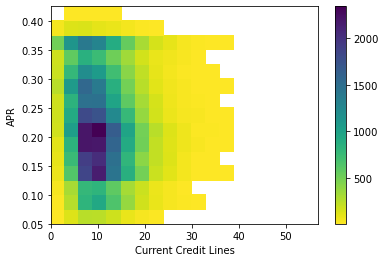

In [100]:
bins_x = np.arange(0, 60, 3)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'CurrentCreditLines', y = 'BorrowerAPR', cmin=5, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Current Credit Lines')
plt.ylabel('APR');

>  There does not appear to be a strong relationship here. Most values are concentrated near the peak of current credit lines, and span the range of APR.

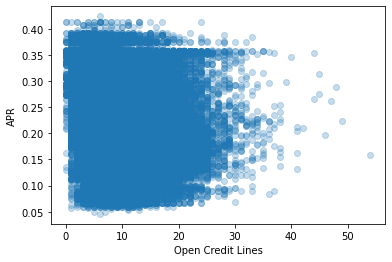

In [101]:
plt.scatter(data=prosper2, x='OpenCreditLines', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Open Credit Lines')
plt.ylabel('APR');

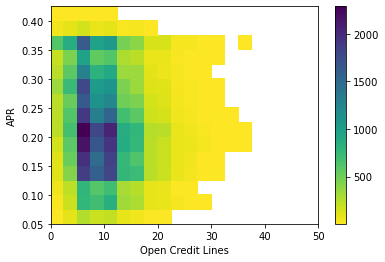

In [102]:
bins_x = np.arange(0, 52.5, 2.5)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'OpenCreditLines', y = 'BorrowerAPR', cmin=5, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Open Credit Lines')
plt.ylabel('APR');

>  As in the previous variable, there does not appear to be a strong relationship here. Most values are concentrated near the peaks of open credit lines, and span the range of APR.

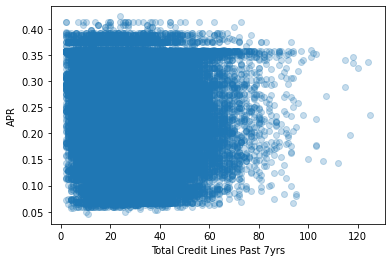

In [103]:
plt.scatter(data=prosper2, x='TotalCreditLinespast7years', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Total Credit Lines Past 7yrs')
plt.ylabel('APR');

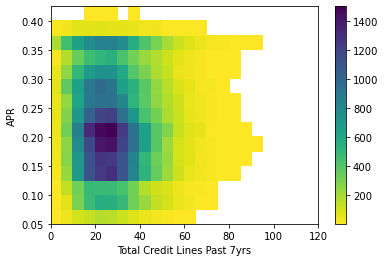

In [104]:
bins_x = np.arange(0, 125, 5)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'TotalCreditLinespast7years', y = 'BorrowerAPR', cmin=5, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Total Credit Lines Past 7yrs')
plt.ylabel('APR');

> As for the previous 2 variables, no obvious relationship. Concentrations near peaks of number of credit lines.

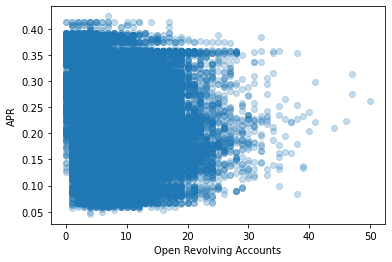

In [105]:
plt.scatter(data=prosper2, x='OpenRevolvingAccounts', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Open Revolving Accounts')
plt.ylabel('APR');

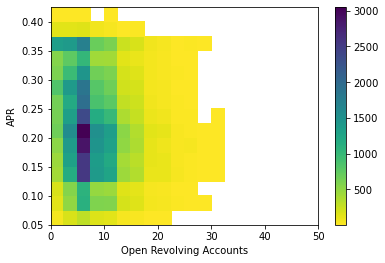

In [106]:
bins_x = np.arange(0, 52.5, 2.5)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'OpenRevolvingAccounts', y = 'BorrowerAPR', cmin=5, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Open Revolving Accounts')
plt.ylabel('APR');

> Same lack of relationship as seen in previous 3 account-related variables

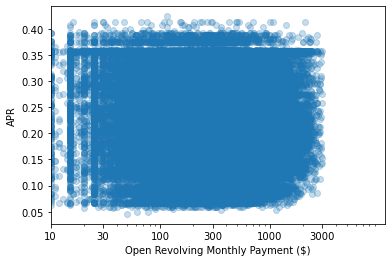

In [107]:
new_tix = [10, 30, 100, 300, 1000, 3000]
new_labs = ['{}'.format(v) for v in new_tix]
plt.scatter(data=prosper2, x='OpenRevolvingMonthlyPayment', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Open Revolving Monthly Payment ($)')
plt.xscale('log')
plt.xticks(new_tix, new_labs)
plt.ylabel('APR');

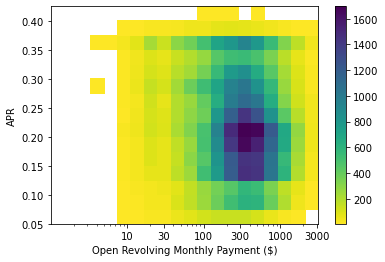

In [108]:
bins_x = 10**np.arange(0,3.5+0.175,0.175)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'OpenRevolvingMonthlyPayment', y = 'BorrowerAPR', cmin=5, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Open Revolving Monthly Payment ($)')
plt.xscale('log')
plt.xticks(new_tix, new_labs)
plt.ylabel('APR');

> As for the previous variables, no obvious relationship. Concentrations at peaks of both variable without a clear trend in APR as a function of payment amount.

> Note that outliers (>\\$3,000) were removed from the above data

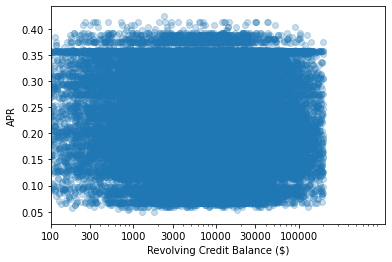

In [109]:
new_tix = [100, 300, 1000, 3000, 10000, 30000, 100000]
new_labs = ['{}'.format(v) for v in new_tix]
plt.scatter(data=prosper2, x='RevolvingCreditBalance', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Revolving Credit Balance ($)')
plt.xscale('log')
plt.xticks(new_tix, new_labs)
plt.ylabel('APR');

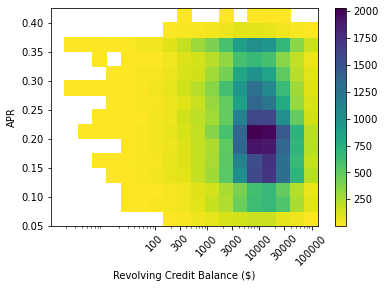

In [110]:
bins_x = 10**np.arange(0,5.4,0.27)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'RevolvingCreditBalance', y = 'BorrowerAPR', cmin=5, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Revolving Credit Balance ($)')
plt.xscale('log')
plt.xticks(new_tix, new_labs, rotation=45)
plt.ylabel('APR');

> Similar behavior to the previous variables and no obvious relationship.

> Note that outliers (>\\$200k) were removed from the data above.

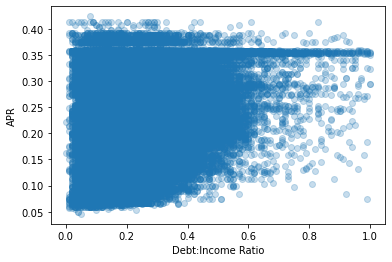

In [111]:
plt.scatter(data=prosper2, x='DebtToIncomeRatio', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Debt:Income Ratio')
plt.ylabel('APR');

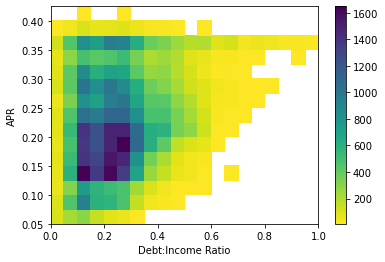

In [112]:
bins_x = np.arange(0, 1.05, 0.05)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', cmin=10, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Debt:Income Ratio')
plt.ylabel('APR');

> APR tends to increase with Debt:Income ratio, although there is a band at an APR of ~0.35 that appears to be relatively independent of the ratio. This may need to be investigated further.

> Note that this is with outliers (ratio > 1.0) removed.

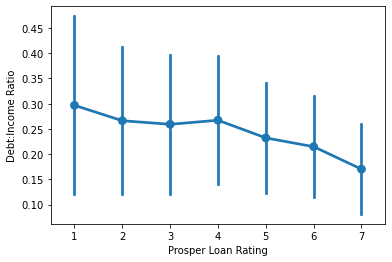

In [113]:
sb.pointplot(data=prosper2, x='ProsperRating (numeric)', y='DebtToIncomeRatio', ci='sd')
plt.ylabel('Debt:Income Ratio')
plt.xlabel('Prosper Loan Rating');

> Loan rating shows a slightly increasing trend with decreasing debt:income ratio

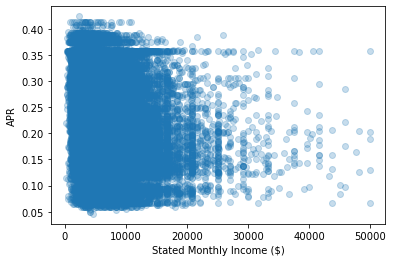

In [114]:
plt.scatter(data=prosper2, x='StatedMonthlyIncome', y='BorrowerAPR', alpha=0.25)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('APR');

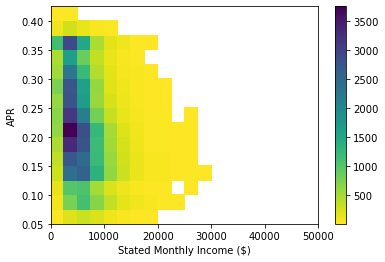

In [115]:
bins_x = np.arange(0, 52500, 2500)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', cmin=10, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('APR');

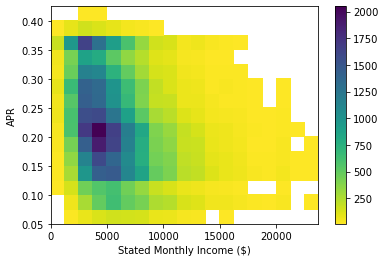

In [116]:
bins_x = np.arange(0, 25000, 1250)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', cmin=10, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('APR');

> There is not an obvious trend in APR with increasing income. Although at the very high end of the range, the APRs mostly tend to be lower, there are few loans in this range.

> Note that this is with the extreme outliers (income >\\$50k/mo) removed

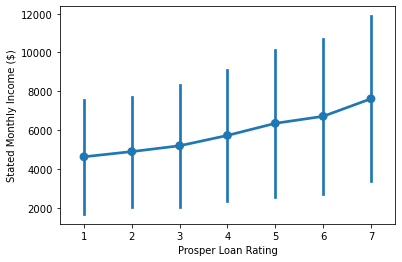

In [117]:
sb.pointplot(data=prosper2, x='ProsperRating (numeric)', y='StatedMonthlyIncome', ci='sd')
plt.ylabel('Stated Monthly Income ($)')
plt.xlabel('Prosper Loan Rating');

> Loan Rating shows a slight increase with income. This may indicate that income has minimal effect, and is only showing the relationship it has to Loan Rating, which has a much stronger effect on APR.

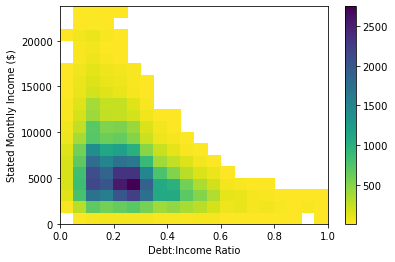

In [118]:
bins_x = np.arange(0, 1.05, 0.05)
bins_y = np.arange(0, 25000, 1250)
plt.hist2d(data=prosper2, x = 'DebtToIncomeRatio', y = 'StatedMonthlyIncome', cmin=10, cmap='viridis_r', bins=([bins_x, bins_y]))
plt.colorbar()
plt.xlabel('Debt:Income Ratio')
plt.ylabel('Stated Monthly Income ($)');

> Debt:Income ratio appears to show a relatively sharp decline at increasing income

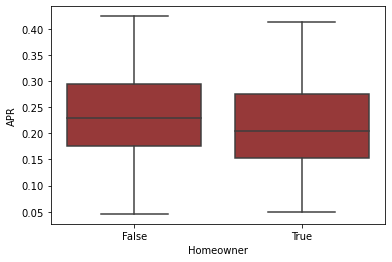

In [119]:
sb.boxplot(data=prosper2, x='IsBorrowerHomeowner', y='BorrowerAPR',  color='brown')
plt.xlabel('Homeowner')
plt.ylabel('APR');

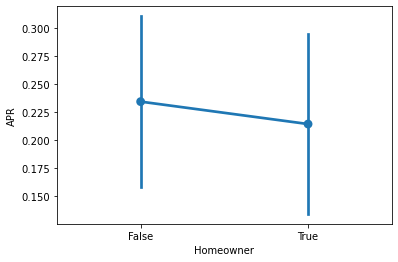

In [120]:
sb.pointplot(data=prosper2, x='IsBorrowerHomeowner', y='BorrowerAPR', ci='sd')
plt.ylabel('APR')
plt.xlabel('Homeowner');

> Home ownership appears to be associated with a very slightly lower APR.

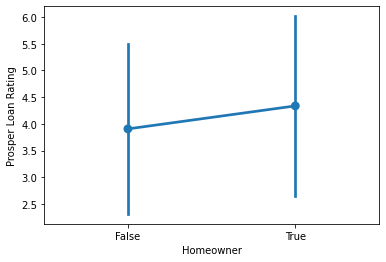

In [121]:
sb.pointplot(data=prosper2, x='IsBorrowerHomeowner', y='ProsperRating (numeric)', ci='sd')
plt.ylabel('Prosper Loan Rating')
plt.xlabel('Homeowner');

> This may be because it's associated with a slightly higher loan rating

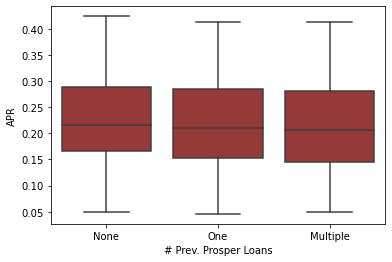

In [122]:
sb.boxplot(data=prosper2, x='NumLoans', y='BorrowerAPR',  color='brown')
plt.xlabel('# Prev. Prosper Loans')
plt.ylabel('APR');

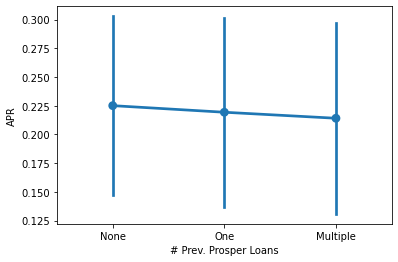

In [123]:
sb.pointplot(data=prosper2, x='NumLoans', y='BorrowerAPR', ci='sd')
plt.ylabel('APR')
plt.xlabel('# Prev. Prosper Loans');

> Having one or more prior loans from Prosper also appears to result in a very slightly lower APR

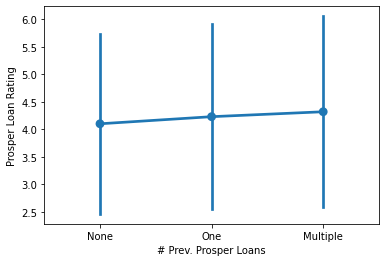

In [124]:
sb.pointplot(data=prosper2, x='NumLoans', y='ProsperRating (numeric)', ci='sd')
plt.ylabel('Prosper Loan Rating')
plt.xlabel('# Prev. Prosper Loans');

> Possibly because it is also associated with a very slightly higher loan rating

### Relationships of features of interest to other features in the dataset

> The strongest influence on APR appears to be the Prosper loan rating. This is a composite of the Prosper risk score and credit score, and appears to be the primary metric Prosper uses for determining loan risk. Since more creditworthy buyers receive the lowest APRs, this makes sense

> Obviously, the Prosper risk score and credit score will also be correlated to APR, since they are constituents of the loan rating score. They displayed similar relationships to loan rating.

> The next most influential variable appeared to be the loan amount, with larger amounts receiving lower APRs

> Of the credit report-related variables that are __not__ part of the prosper score (see above for a list), none except Debt:Income ratio showed a relationship to APR. This likely means that Prosper selected out all the important variables in creating their risk score.

> Homeowner status also was associated very slightly with lower APR, although this appears to be due to its relationship to a slightly higher loan rating.

> Similarly, having had a prior Prosper loan seems to result in a very slightly lower APR, again possibly because it results in a very slightly higher loan rating.

### Interesting relationships between the other features

> Loan amount was lower for the lowest-rated loans. This may be a result of investors wanting to limit the amount of their exposure to higher-risk loans.

> The two constituents of the loan rating variable, Prosper score and credit score, both appeared related to loan rating in a stepwise-increasing fashion. This could indicate these variables are split into categorical bins when calculating the loan rating.

> Debt:Income ratio, one of the few credit report variables showing an association with APR, was also slightly associated with loan score (higher loan score with lower ratio). This could indicate the influence of Debt:Income ratio is indirect via its association with loan rating.

> Loan rating also showed a slight increase with income, although income did not appear to be related to APR.

> Debt:Income ratio seemed to have a hyperbolic relationship to income, with lower ratios at higher incomes.

## Multivariate Exploration

/home/umahp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


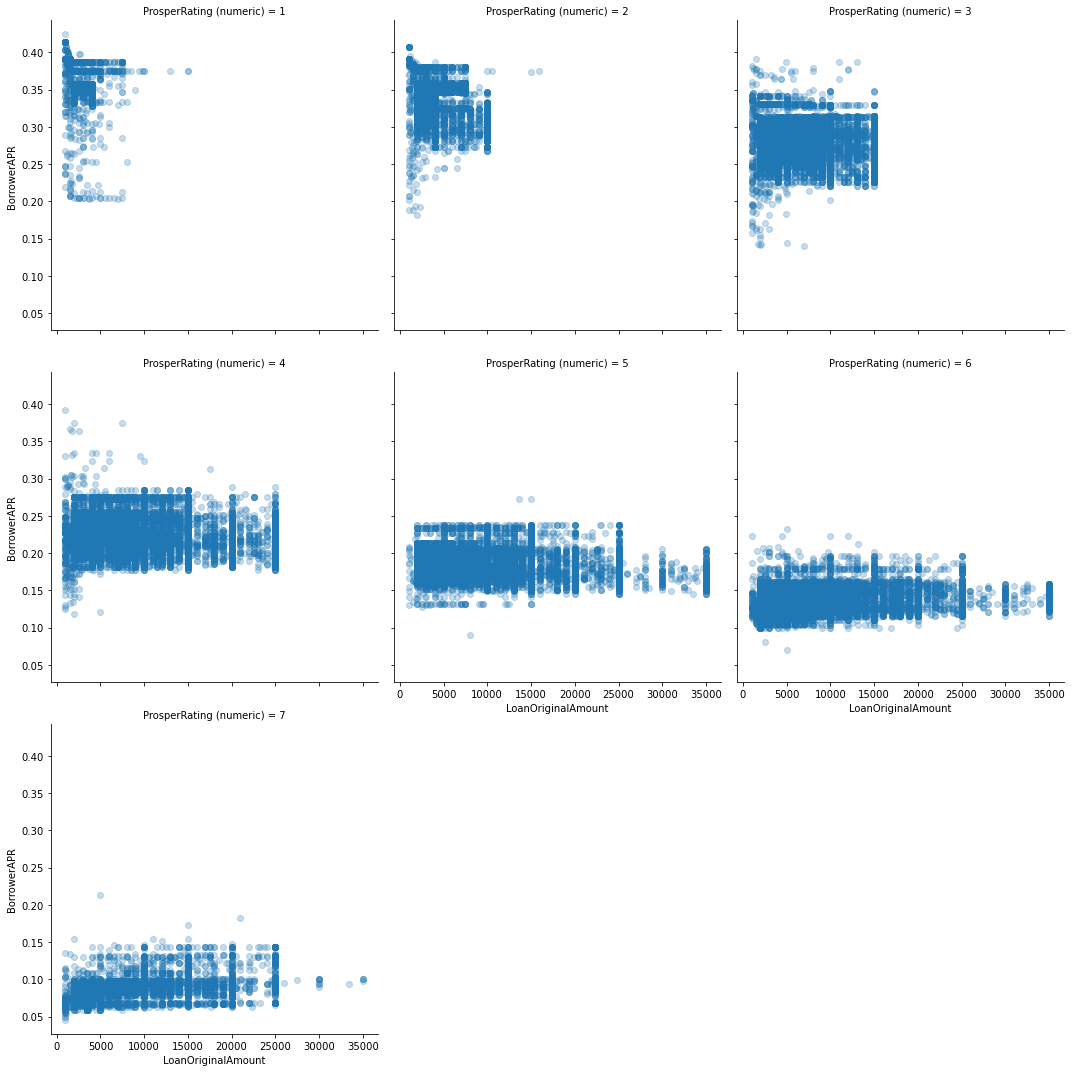

In [125]:
g = sb.FacetGrid(prosper2, size=5, col='ProsperRating (numeric)', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', fit_reg=False, scatter_kws={'alpha':0.25});

> There does not appear to be a significant influence of loan amount on APR when stratified by loan rating. However, it appears higher-amount loans receive lower APRs and are only issued to those with high loan ratings.

In [126]:
prosper2['LoanGT25k'] = ''
prosper2.loc[prosper2['LoanOriginalAmount'] <= 25000,'LoanGT25k'] = "No"
prosper2.loc[prosper2['LoanOriginalAmount'] > 25000,'LoanGT25k'] = "Yes"

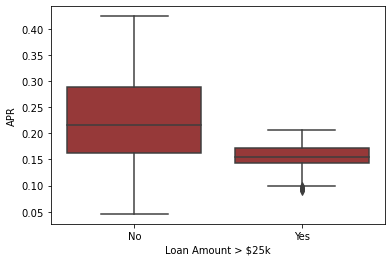

In [127]:
sb.boxplot(data=prosper2, x='LoanGT25k', y='BorrowerAPR',  color='brown')
plt.xlabel('Loan Amount > $25k')
plt.ylabel('APR');

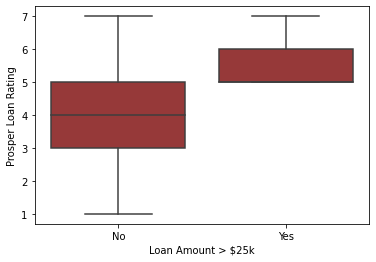

In [128]:
sb.boxplot(data=prosper2, x='LoanGT25k', y='ProsperRating (numeric)',  color='brown')
plt.xlabel('Loan Amount > $25k')
plt.ylabel('Prosper Loan Rating');

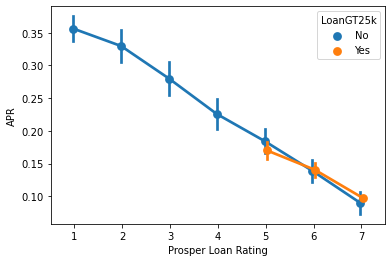

In [129]:
sb.pointplot(data=prosper2, x='ProsperRating (numeric)', y='BorrowerAPR', hue='LoanGT25k', ci='sd', dodge=True)
plt.ylabel('APR')
plt.xlabel('Prosper Loan Rating');

> The effect of loan amount on APR disappears when loans are compared based on rating.

/home/umahp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


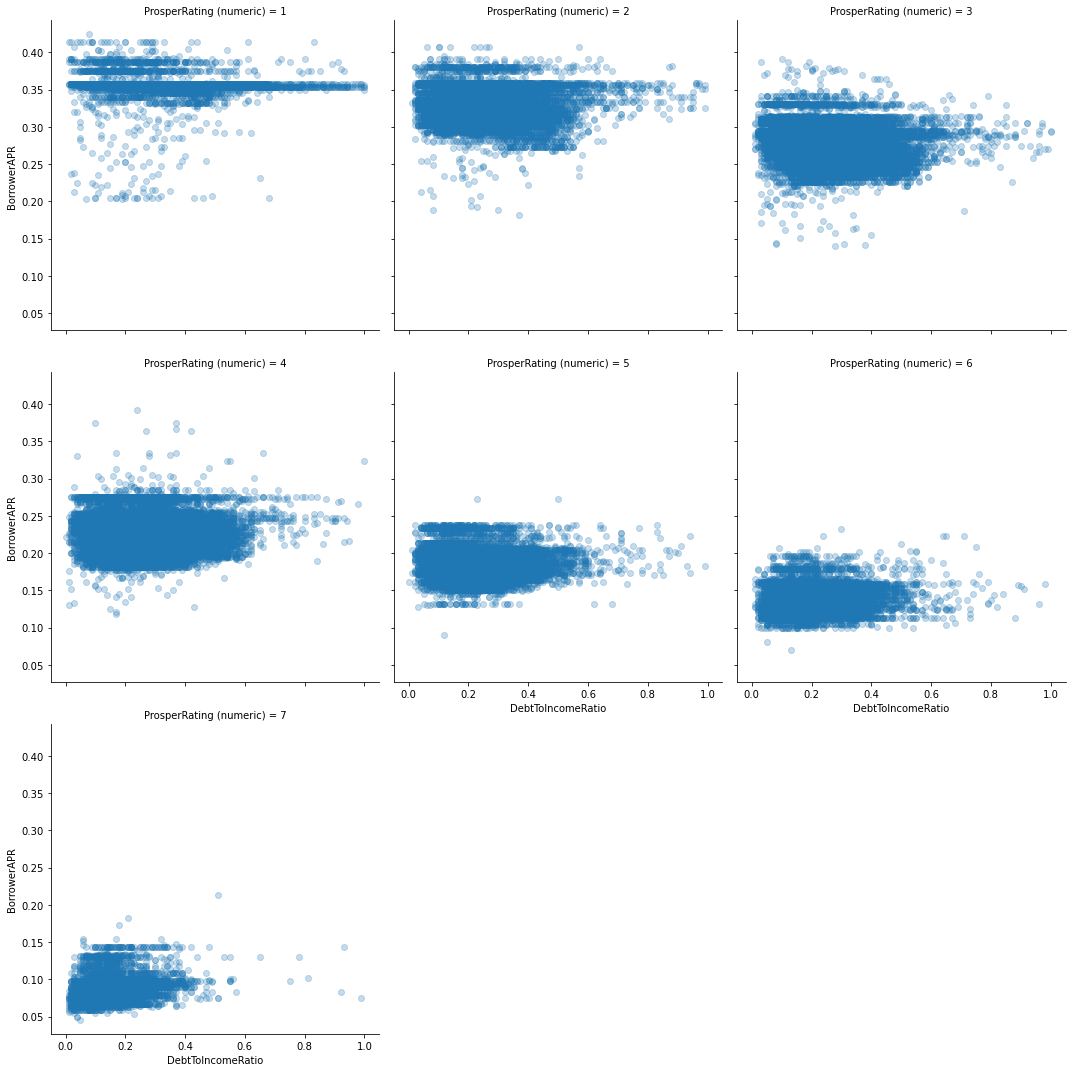

In [130]:
g = sb.FacetGrid(prosper2, size=5, col='ProsperRating (numeric)', col_wrap=3)
g.map(sb.regplot, 'DebtToIncomeRatio', 'BorrowerAPR', fit_reg=False, scatter_kws={'alpha':0.25});

> There does not appear to be a significant influence of Debt:Income ratio on APR when stratified by loan rating.

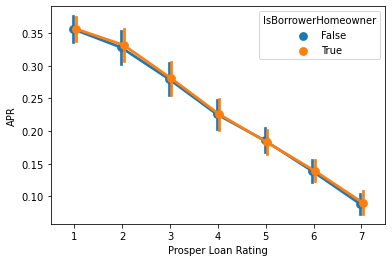

In [131]:
sb.pointplot(data=prosper2, x='ProsperRating (numeric)', y='BorrowerAPR', hue='IsBorrowerHomeowner', ci='sd', dodge=True)
plt.ylabel('APR')
plt.xlabel('Prosper Loan Rating');

> The slight decrease in APR for homeowners appears to be insignificant compared to the effect of loan rating.

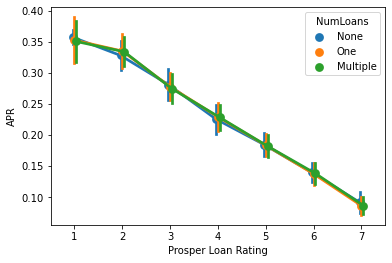

In [132]:
sb.pointplot(data=prosper2, x='ProsperRating (numeric)', y='BorrowerAPR', hue='NumLoans', ci='sd', dodge=True)
plt.ylabel('APR')
plt.xlabel('Prosper Loan Rating');

> Similarly, the slight decrease in APR for borrowers with a prior Prosper loan appears insignificant compared to the effect of loan rating.

/home/umahp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


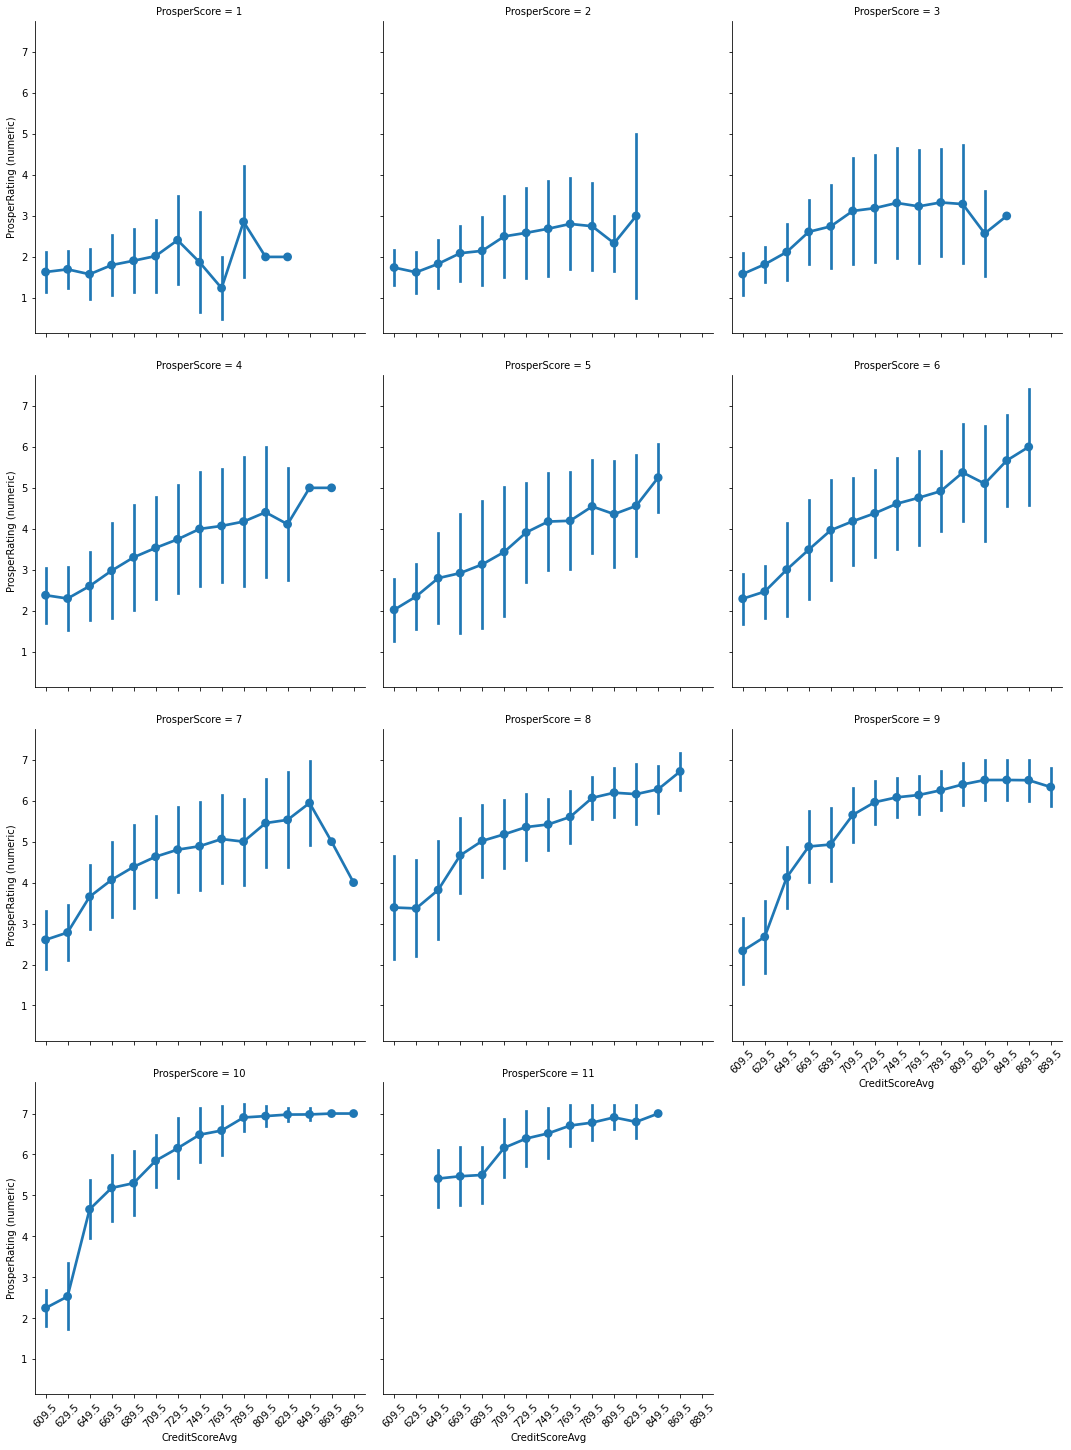

In [133]:
g = sb.FacetGrid(prosper2, size=5, col='ProsperScore', col_wrap=3)
g.map(sb.pointplot, 'CreditScoreAvg', 'ProsperRating (numeric)',order=np.arange(609.5,909.5,20), ci='sd')
g.set_xticklabels(rotation=45);

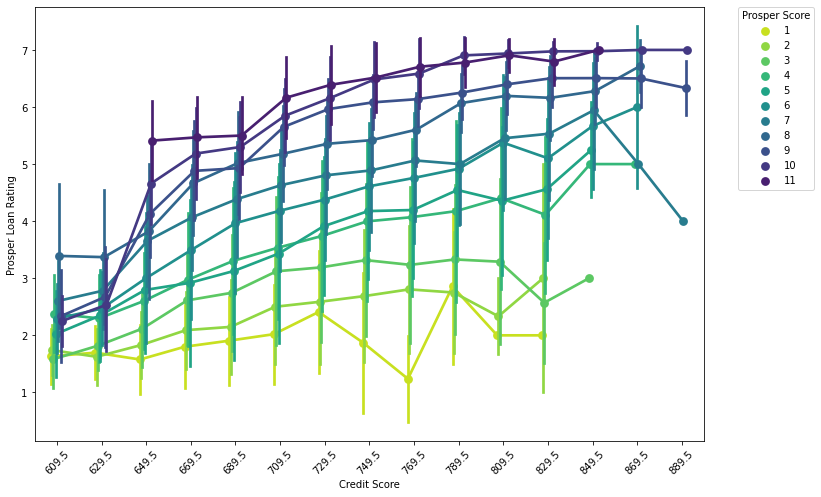

In [134]:
plt.figure(figsize=(12,8))
sb.pointplot(data=prosper2, y='ProsperRating (numeric)', x='CreditScoreAvg', hue='ProsperScore', ci='sd', dodge=True, palette='viridis_r')
plt.xlabel('Credit Score')
plt.ylabel('Prosper Loan Rating')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Prosper Score')
plt.show;

> There appears to be an interaction between credit score and Prosper score. See below for more detail.

### Multivariate relationships between features of interest

> There does not appear to be a significant influence of loan amount on APR when stratified by loan rating. However, it does appear that loans >\\$25k are only given to borrowers with a loan rating >= 5. It also appears generally that these higher-dollar loans have lower APRs.

> Examining this further: compared to all loans <=\\$25k, loans for >\\$25k enjoy lower APRs. However, these loans are only given to borrowers with a loan rating >= 5. When compared to loans <=\\$25k given to borrowers with loan ratings >=5, the APRs are not different.

> The minor effects of debt:income ratio, homeowner status, and number of previous Prosper loans on APR appear insignificant when stratified by loan rating.

### Interesting interactions between features

> In terms of the constitutents of the loan rating, there appears to be an interaction between credit score and Prosper score. At lower Prosper scores, the slope of credit score vs. loan rating is less steep than at higher scores. At higher Prosper scores, the relationship also seems more stepwise than linear, as was shown in the bivariate plots. Finally, the relationships do not appear to be completely monotonic, c.f. at Prosper scores 1, 2, and 3 especially. This may indicate that the formula is non-linear, or that there are additional factors included that aren't disclosed by Prosper.


In [135]:
prosper2.to_csv('prosper2.csv')